# CS182 HW2 - Accelerating Gradient Descent with Momentum (coding part)

In this notebook, we will understand gradient descent and  gradient descent with momentum in practice.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

## Generate and Visualize Data

We generate a dataset of 2D datapoints from the gaussian distribution with a mean of $(-3, 0)$ and covariance matrix of $\begin{pmatrix}3 & 0 \\ 0 & 1\end{pmatrix}$. The binary labels $y$ indicate whether the second dimension is greater than 0 (positive) or not (negative). The data is visualized using a scatter plot with different colors representing the different labels.

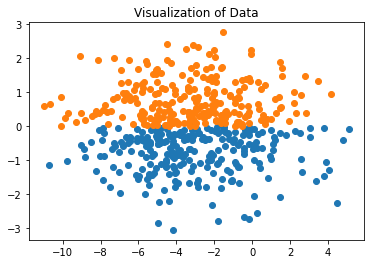

In [ ]:
def gen_gaussian_points(n, mean, sigma):
    return np.random.normal(mean, sigma, [n, 2])

N = 500

X = gen_gaussian_points(N, [-3, 0], [3, 1])
y = (X[:,1]>0).astype(float)
y = np.expand_dims(y, axis=-1)


plt.scatter(*X[y.squeeze()==0].T)
plt.scatter(*X[y.squeeze()==1].T)
plt.title("Visualization of Data")
plt.show()

## Visualizing the Loss Landscape

The following contour plot visualizes the loss landscape of this optimization task. It's important to note that the data has been generated such that the correlation coefficient between dimension 0 and dimension 1 is zero, aligning dimension 0 and dimension 1 with the two singular vectors in the Singular Value Decomposition (SVD) of the data matrix.

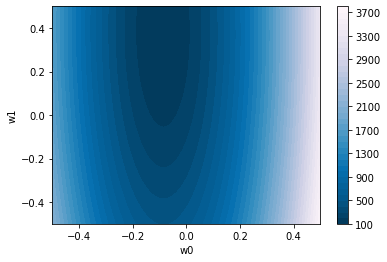

In [ ]:
w0_s, w1_s = np.meshgrid(np.linspace(-0.5, 0.5, 100), np.linspace(-0.5, 0.5, 100))
w_s = np.stack([w0_s.reshape(-1), w1_s.reshape(-1)], axis=1)
loss_s = ((X @ w_s.T - y) ** 2).sum(axis=0).reshape(100, 100)
from matplotlib import ticker, cm
plt.contourf(w0_s, w1_s, loss_s, cmap=cm.PuBu_r, levels=40)
plt.colorbar()
plt.xlabel("w0")
plt.ylabel("w1")
plt.show()

## (Plain) Gradient Descent
We will implement gradient descent *without* momentum below.

In [ ]:
def runGD(maxiter,stepsize):
    w = np.zeros((2, 1))
    grads = []
    ws = []
    losses = []
    for i in range(maxiter):
        grad = 2 * (X.T @ X @ w) - 2 * X.T @ y
        w = w - stepsize * grad
        grads.append(grad)
        ws.append(w)
        loss = np.linalg.norm(y - X @ w) ** 2
        losses.append(loss)
    print("Final loss =", loss)
    grads = np.array(grads).squeeze()
    ws = np.array(ws).squeeze()
    return grads, ws, losses 

maxiter = 100
stepsize = 1e-4
grads, ws, losses = runGD(maxiter,stepsize)

Final loss = 102.75171092495734


## Gradient Descent with Momentum
Implement the gradient descent with momentum algorithm. **Fill in the missing code** for updating the parameters. As a verification step, compare the final loss with the previous part to ensure it is reasonable and not significantly different.

In [ ]:
def runGDM(maxiter, stepsize, beta):
    w = np.zeros((2, 1))
    grads_m = []
    ws_m = []
    losses_m = []
    for i in range(maxiter):
        grad = 2 * (X.T @ X @ w) - 2 * X.T @ y
        if i == 0:
            smoothed_grad = grad
        ###############################################
        ###       TODO: YOUR CODE HERE              ###
        ###############################################
        grad = 2*(X.T@X@w)-2*X.T@y
        if i == 0:
            smoothed_grad = grad
        smoothed_grad = (1-beta)*smoothed_grad + beta*grad
        ###############################################
        ###       END OF YOUR CODE                  ###
        ###############################################
        w = w - stepsize * smoothed_grad
        grads_m.append(grad)
        ws_m.append(w)
        loss = np.linalg.norm(y - X @ w) ** 2
        losses_m.append(loss)
    print("Final loss =", loss)
    grads_m = np.array(grads_m).squeeze()
    ws_m = np.array(ws_m).squeeze()
    return grads_m, ws_m, losses_m

maxiter = 100
stepsize = 1e-4
beta = 0.6
grads_m, ws_m, losses_m = runGDM(maxiter, stepsize, beta)

Final loss = 102.75171088019901


## Visualize the Parameters and Gradients of Different Dimensions

In this section, we will visualize the gradients and parameters of two gradient descent methods in each iteration of training.

### Gradient Descent w/o Momentum

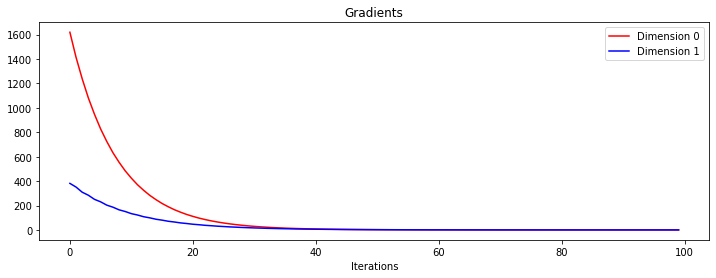

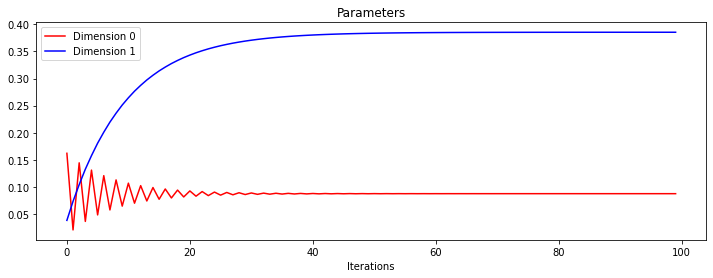

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(grads)[:,0], 'r', label="Dimension 0")
plt.plot(range(maxiter), np.abs(grads)[:,1], 'b', label="Dimension 1")
plt.title("Gradients")
plt.xlabel("Iterations")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(ws)[:,0], 'r', label="Dimension 0")
plt.plot(range(maxiter), np.abs(ws)[:,1], 'b', label="Dimension 1")
plt.title("Parameters")
plt.xlabel("Iterations")
plt.legend()
plt.show()

### Gradient Descent with Momentum

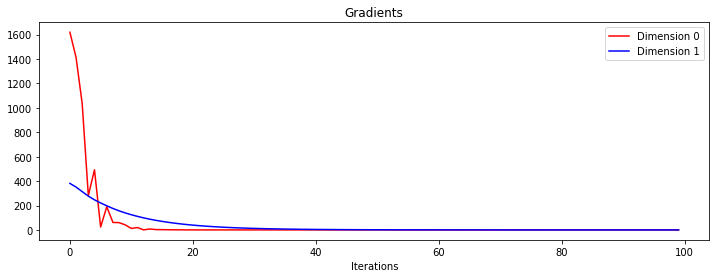

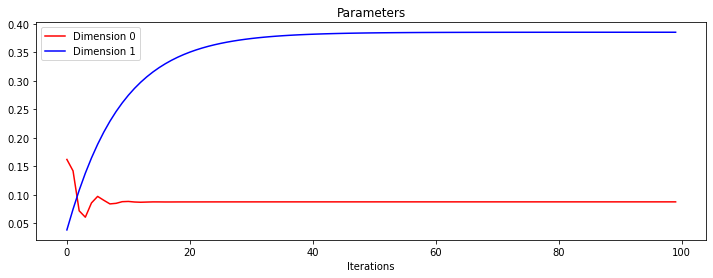

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(grads_m)[:,0], 'r', label="Dimension 0")
plt.plot(range(maxiter), np.abs(grads_m)[:,1], 'b', label="Dimension 1")
plt.title("Gradients")
plt.xlabel("Iterations")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(ws_m)[:,0], 'r', label="Dimension 0")
plt.plot(range(maxiter), np.abs(ws_m)[:,1], 'b', label="Dimension 1")
plt.title("Parameters")
plt.xlabel("Iterations")
plt.legend()
plt.show()

**Question: How does $\sigma_i$ (the eigenvalues) influence the gradients and paramters updates?** Please answer this question in your written assignment.

## Compare gradient descent and gradient desent with momentum
### Comparing gradient changes with different iterations

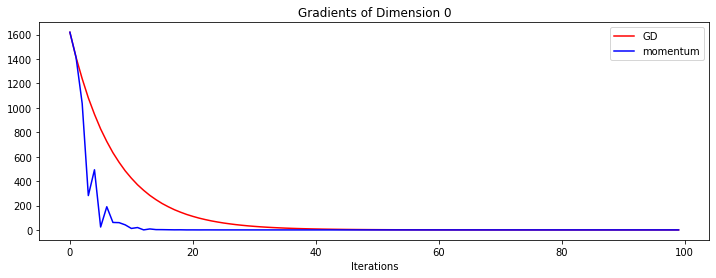

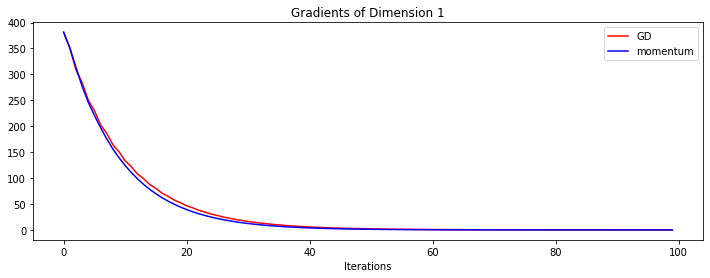

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(grads)[:,0], 'r', label="GD")
plt.plot(range(maxiter), np.abs(grads_m)[:,0], 'b', label="momentum")
plt.title("Gradients of Dimension 0")
plt.xlabel("Iterations")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(grads)[:,1], 'r', label="GD")
plt.plot(range(maxiter), np.abs(grads_m)[:,1], 'b', label="momentum")
plt.title("Gradients of Dimension 1")
plt.xlabel("Iterations")
plt.legend()
plt.show()

### Comparing parameter changes with different iterations

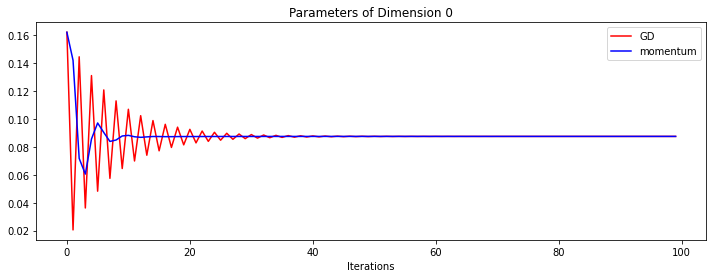

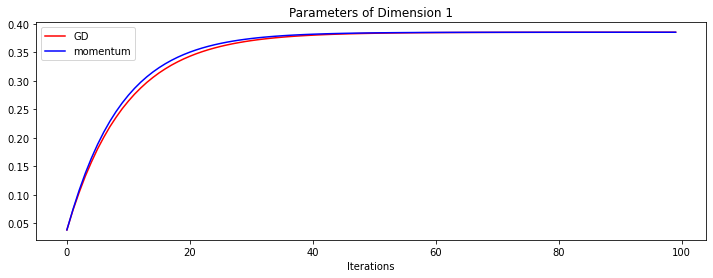

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(ws)[:,0], 'r', label="GD")
plt.plot(range(maxiter), np.abs(ws_m)[:,0], 'b', label="momentum")
plt.title("Parameters of Dimension 0")
plt.xlabel("Iterations")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(ws)[:,1], 'r', label="GD")
plt.plot(range(maxiter), np.abs(ws_m)[:,1], 'b', label="momentum")
plt.title("Parameters of Dimension 1")
plt.xlabel("Iterations")
plt.legend()
plt.show()

### Comparing loss with different iterations
Note that to maximize the visibiity, we will visualize $\log (\text{loss}_i-loss_*)$, where $\text{loss}_i$ is the loss at iteration $i$ and $loss_*$ is the optimal loss.



<ipython-input-121-d99d082f4537>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(maxiter), np.log(np.abs(losses)-losses[-1]), 'r', label="GD")
<ipython-input-121-d99d082f4537>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(maxiter), np.log(np.abs(losses_m)-losses_m[-1]), 'b', label="momentum")


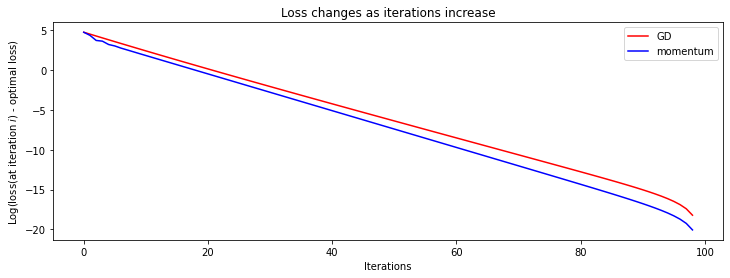

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.log(np.abs(losses)-losses[-1]), 'r', label="GD")
plt.plot(range(maxiter), np.log(np.abs(losses_m)-losses_m[-1]), 'b', label="momentum")
plt.title("Loss changes as iterations increase")
plt.legend()
plt.ylabel("Log(loss(at iteration $i$) - optimal loss)")
plt.xlabel("Iterations")
plt.show()

**Question 1: Comparing gradient descent and gradient descent with momentums, which one converges faster for this task? Why?** Please answer this question in your written assignment.

**Question 2: If one method converges faster, can you try change the learning rate to further accelerate the convergence? Please re-run one method with different learning rate, and compare the gradients, parameters and loss with the other method.**
*Hint: The learning rate cannot be too large, otherwise the function may not converge.*

In [ ]:
###############################################
###       TODO: YOUR CODE HERE              ###
###############################################
maxiter = 100
stepsize = 2e-4
beta = 0.6
grads_m, ws_m, losses_m = runGDM(maxiter, stepsize, beta)
###############################################
###       END OF YOUR CODE                  ###
###############################################

Final loss = 102.75171087273301


### After changing learning rate, compare gradient changes with different iterations
*Hint: You should see now that a dimension will have much larger gap between two methods. That is a benefit from larger learning rate.*

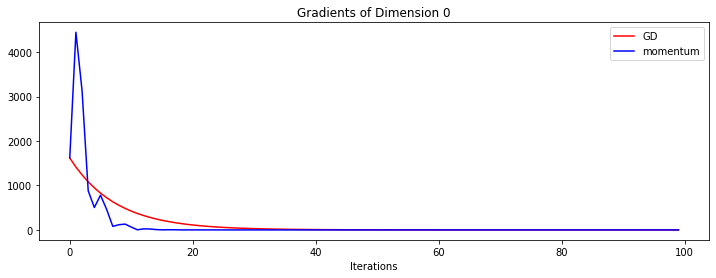

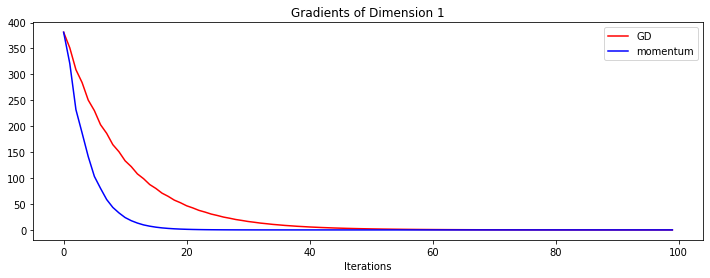

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(grads)[:,0], 'r', label="GD")
plt.plot(range(maxiter), np.abs(grads_m)[:,0], 'b', label="momentum")
plt.title("Gradients of Dimension 0")
plt.xlabel("Iterations")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(grads)[:,1], 'r', label="GD")
plt.plot(range(maxiter), np.abs(grads_m)[:,1], 'b', label="momentum")
plt.title("Gradients of Dimension 1")
plt.xlabel("Iterations")
plt.legend()
plt.show()

### After changing learning rate, compare parameter changes with different iterations
*Hint: You should see now that a dimension will have much larger gap between two methods. That is a benefit from larger learning rate.*

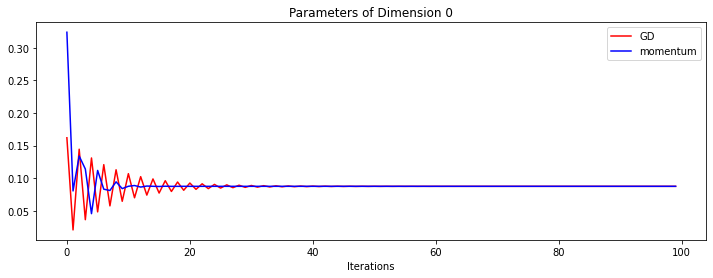

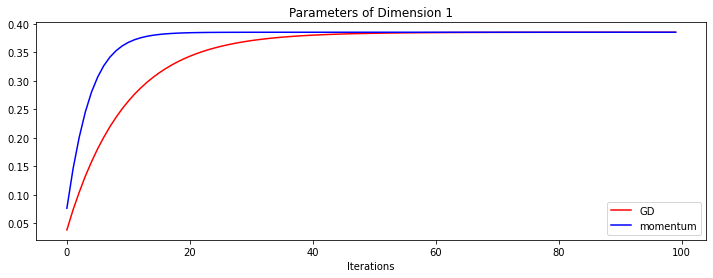

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(ws)[:,0], 'r', label="GD")
plt.plot(range(maxiter), np.abs(ws_m)[:,0], 'b', label="momentum")
plt.title("Parameters of Dimension 0")
plt.xlabel("Iterations")
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.abs(ws)[:,1], 'r', label="GD")
plt.plot(range(maxiter), np.abs(ws_m)[:,1], 'b', label="momentum")
plt.title("Parameters of Dimension 1")
plt.xlabel("Iterations")
plt.legend()
plt.show()

### After changing learning rate, compare loss changes with different iterations
*Hint: You should see now one method is much faster than the other one.*

<ipython-input-125-d99d082f4537>:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(maxiter), np.log(np.abs(losses)-losses[-1]), 'r', label="GD")
<ipython-input-125-d99d082f4537>:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(range(maxiter), np.log(np.abs(losses_m)-losses_m[-1]), 'b', label="momentum")
<ipython-input-125-d99d082f4537>:3: RuntimeWarning: invalid value encountered in log
  plt.plot(range(maxiter), np.log(np.abs(losses_m)-losses_m[-1]), 'b', label="momentum")


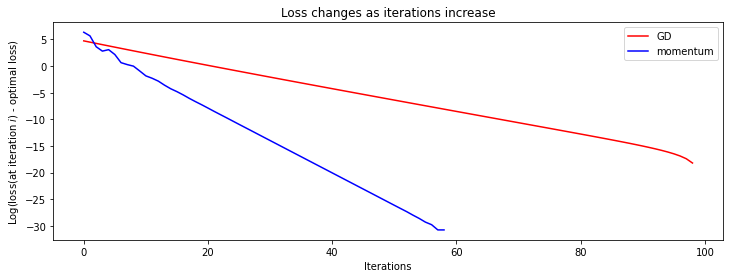

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(range(maxiter), np.log(np.abs(losses)-losses[-1]), 'r', label="GD")
plt.plot(range(maxiter), np.log(np.abs(losses_m)-losses_m[-1]), 'b', label="momentum")
plt.title("Loss changes as iterations increase")
plt.legend()
plt.ylabel("Log(loss(at iteration $i$) - optimal loss)")
plt.xlabel("Iterations")
plt.show()